
<font size="6"> Final Project Intro To Data Science 2020-21</font>


<font size="4">12/02/2021</font>

Submitted by: Artem Zinenko



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Load the Data using  encoding "ISO-8859-8" to open the CSV file with Hebrew string 

In [2]:
YAD2_DF = pd.read_csv('YAD2_DATA.csv', encoding = "ISO-8859-8")
YAD2_DF.head()


,מטבח כשר,משופצת,"ממ""ד",דלתות פנדור,מזגן תדיראן,ריהוט,גישה לנכים,מיזוג,מעלית,מחסן,...,מצב הנכס,סוג נכס,עיר,שכונה,תיווך,ציון,חדרים,קומה,"מ""ר",מחיר
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,חדש,גג/פנטהאוז,חולון,"[' מרכז', ' קרית עבודה']",0,4.3,3.5,5,170,"2,990,000 ¤"
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,במצב שמור,דירה,חולון,[' קרית שרת מזרח'],0,4.5,3,3,70,"1,400,000 ¤"
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,חדש מקבלן,דירה,חולון,"[' מרכז', ' קרית עבודה']",0,4.3,3,2,70,"1,890,000 ¤"
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,חדש מקבלן,דירת גן,חולון,"[' מרכז', ' קרית עבודה']",0,4.3,4,קרקע,145,"2,590,000 ¤"
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,חדש,גג/פנטהאוז,חולון,[' קרית אילון'],0,3.9,6,12,350,"4,500,000 ¤"


## Data Cleaning and Processing


In [3]:
YAD2_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 24 columns):
מטבח כשר       451 non-null float64
משופצת         1684 non-null float64
ממ"ד           1684 non-null float64
דלתות פנדור    1684 non-null float64
מזגן תדיראן    1704 non-null float64
ריהוט          1684 non-null float64
גישה לנכים     1728 non-null float64
מיזוג          1684 non-null float64
מעלית          1684 non-null float64
מחסן           1728 non-null float64
סורגים         1684 non-null float64
חניות          1692 non-null object
מרפסות         896 non-null float64
קומות בבנין    1587 non-null float64
מצב הנכס       1692 non-null object
סוג נכס        1727 non-null object
עיר            1727 non-null object
שכונה          1727 non-null object
תיווך          1775 non-null int64
ציון           1773 non-null object
חדרים          1727 non-null object
קומה           1727 non-null object
מ"ר            1727 non-null object
מחיר           1650 non-null object
dtypes: float64(13)

In [4]:
YAD2_DF.columns

Index(['מטבח כשר', 'משופצת', 'ממ"ד', 'דלתות פנדור', 'מזגן תדיראן', 'ריהוט',
       'גישה לנכים', 'מיזוג', 'מעלית', 'מחסן', 'סורגים', 'חניות', 'מרפסות',
       'קומות בבנין', 'מצב הנכס', 'סוג נכס', 'עיר', 'שכונה', 'תיווך', 'ציון',
       'חדרים', 'קומה', 'מ"ר', 'מחיר'],
      dtype='object')

Rename for the Hebrew columns 

In [5]:
dictionary_rename_columns = {"מטבח כשר":"Kosher kitchen","משופצת":"Renovated",'ממ"ד':"MMD","דלתות פנדור":"Pandor doors","מזגן תדיראן":"Tadiran conditioner",
                   "ריהוט":"Furniture","גישה לנכים":'Access for disabled','מיזוג':'Air conditioner',"מעלית":'Lift','מחסן':'Storage','סורגים':'Bars',
                   'חניות':'Parking','מרפסות':'Balconies','קומות בבנין':'Floors in building','מצב הנכס':'Property condition','סוג נכס': 'Property Type',
                   'עיר':'City','שכונה': 'Neighborhood','תיווך':'Real Estate','ציון':'Score','חדרים':'Rooms','קומה':'Floor','מ"ר':'Apartment size','מחיר':'Price'}


List_binary_columns = ["Floors in building","Balconies",'Kosher kitchen',"Renovated","MMD","Pandor doors","Tadiran conditioner",'Furniture','Access for disabled','Air conditioner','Lift',"Storage",'Bars']


In [6]:
YAD2_DF = YAD2_DF.rename(columns=dictionary_rename_columns)
YAD2_DF

,Kosher kitchen,Renovated,MMD,Pandor doors,Tadiran conditioner,Furniture,Access for disabled,Air conditioner,Lift,Storage,...,Property condition,Property Type,City,Neighborhood,Real Estate,Score,Rooms,Floor,Apartment size,Price
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,חדש,גג/פנטהאוז,חולון,"[' מרכז', ' קרית עבודה']",0,4.3,3.5,5,170,"2,990,000 ¤"
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,במצב שמור,דירה,חולון,[' קרית שרת מזרח'],0,4.5,3,3,70,"1,400,000 ¤"
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,חדש מקבלן,דירה,חולון,"[' מרכז', ' קרית עבודה']",0,4.3,3,2,70,"1,890,000 ¤"
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,חדש מקבלן,דירת גן,חולון,"[' מרכז', ' קרית עבודה']",0,4.3,4,קרקע,145,"2,590,000 ¤"
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,חדש,גג/פנטהאוז,חולון,[' קרית אילון'],0,3.9,6,12,350,"4,500,000 ¤"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,משופץ,דירה,חולון,[' קרית שרת מערב'],1,4.4,5,3,115,"1,860,000 ¤"
1771,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,במצב שמור,פרטי/קוטג',חולון,[' נווה רמז'],1,4.3,7,קרקע,165,"2,530,000 ¤"
1772,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,משופץ,דירה,חולון,[' קרית שרת מערב'],1,4.4,5,3,106,"1,990,000 ¤"
1773,NaN,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,משופץ,דירה,חולון,[],1,4.3,3,1,70,"1,450,000 ¤"


In [7]:
YAD2_DF.columns

Index(['Kosher kitchen', 'Renovated', 'MMD', 'Pandor doors',
       'Tadiran conditioner', 'Furniture', 'Access for disabled',
       'Air conditioner', 'Lift', 'Storage', 'Bars', 'Parking', 'Balconies',
       'Floors in building', 'Property condition', 'Property Type', 'City',
       'Neighborhood', 'Real Estate', 'Score', 'Rooms', 'Floor',
       'Apartment size', 'Price'],
      dtype='object')

We will check which values exist in all the columns

And we will start the process of cleaning and completing data

In [8]:
List_not_binary_columns = []
List_binary_columns = []
for i in YAD2_DF.columns:
    print("==== {} ====\n".format(i))
    value_counts = YAD2_DF[i].value_counts()
    print(value_counts)
    print("\n")
    if len(value_counts) > 2:
        List_not_binary_columns.append(i)
    else:
        List_binary_columns.append(i)

==== Kosher kitchen ====

0.0    392
1.0     59
Name: Kosher kitchen, dtype: int64


==== Renovated ====

1.0    1090
0.0     594
Name: Renovated, dtype: int64


==== MMD ====

0.0    1052
1.0     632
Name: MMD, dtype: int64


==== Pandor doors ====

0.0    846
1.0    838
Name: Pandor doors, dtype: int64


==== Tadiran conditioner ====

0.0    892
1.0    812
Name: Tadiran conditioner, dtype: int64


==== Furniture ====

0.0    1317
1.0     367
Name: Furniture, dtype: int64


==== Access for disabled ====

0.0    871
1.0    857
Name: Access for disabled, dtype: int64


==== Air conditioner ====

1.0    1524
0.0     160
Name: Air conditioner, dtype: int64


==== Lift ====

1.0    960
0.0    724
Name: Lift, dtype: int64


==== Storage ====

0.0    1250
1.0     478
Name: Storage, dtype: int64


==== Bars ====

0.0    940
1.0    744
Name: Bars, dtype: int64


==== Parking ====

1      851
ללא    653
2      175
3       13
Name: Parking, dtype: int64


==== Balconies ====

1.0    722
2.0    1

In [9]:
List_not_binary_columns

['Parking',
 'Balconies',
 'Floors in building',
 'Property condition',
 'Property Type',
 'City',
 'Neighborhood',
 'Score',
 'Rooms',
 'Floor',
 'Apartment size',
 'Price']

In [10]:
List_binary_columns 

['Kosher kitchen',
 'Renovated',
 'MMD',
 'Pandor doors',
 'Tadiran conditioner',
 'Furniture',
 'Access for disabled',
 'Air conditioner',
 'Lift',
 'Storage',
 'Bars',
 'Real Estate']

In [11]:
YAD2_DF[["Floors in building","Balconies"]]

,Floors in building,Balconies
0,5.0,2.0
1,3.0,NaN
2,7.0,1.0
3,7.0,1.0
4,12.0,3.0
...,...,...
1770,6.0,1.0
1771,NaN,NaN
1772,6.0,NaN
1773,3.0,NaN


In [12]:
List_binary_columns.append("Floors in building")
List_binary_columns.append("Balconies")
List_binary_columns

['Kosher kitchen',
 'Renovated',
 'MMD',
 'Pandor doors',
 'Tadiran conditioner',
 'Furniture',
 'Access for disabled',
 'Air conditioner',
 'Lift',
 'Storage',
 'Bars',
 'Real Estate',
 'Floors in building',
 'Balconies']

Filling binary columns

For the value NAN enter 0

In [13]:
print("=====Binary Columns=======")
print("Before delete nan variable\n\n")   
for i in List_binary_columns:    
    print(i ,sum(YAD2_DF[i].isna()))

for i in List_binary_columns: 
    YAD2_DF.loc[:,i].replace(np.nan, 0.0, inplace=True)
    
print("After delete nan variable\n\n")    
for i in List_binary_columns:     
    print(i ,sum(YAD2_DF[i].isna()))

=====Binary Columns=======
Before delete nan variable


Kosher kitchen 1324
Renovated 91
MMD 91
Pandor doors 91
Tadiran conditioner 71
Furniture 91
Access for disabled 47
Air conditioner 91
Lift 91
Storage 47
Bars 91
Real Estate 0
Floors in building 188
Balconies 879
After delete nan variable


Kosher kitchen 0
Renovated 0
MMD 0
Pandor doors 0
Tadiran conditioner 0
Furniture 0
Access for disabled 0
Air conditioner 0
Lift 0
Storage 0
Bars 0
Real Estate 0
Floors in building 0
Balconies 0


In [14]:
print("=====Parking=======")

print("Before delete nan",sum(YAD2_DF["Parking"].isna()))

YAD2_DF.loc[:, "Parking"].replace("ללא",np.nan , inplace=True)
YAD2_DF.loc[:, "Parking"].replace(np.nan,0.0, inplace=True) 

print("After delete nan",sum(YAD2_DF["Parking"].isna())) 


=====Parking=======
Before delete nan 83
After delete nan 0


In [15]:
List_not_binary_columns.pop(List_not_binary_columns.index("Parking"))
List_not_binary_columns.pop(List_not_binary_columns.index("Balconies"))
List_not_binary_columns.pop(List_not_binary_columns.index("Floors in building"))
List_not_binary_columns

['Property condition',
 'Property Type',
 'City',
 'Neighborhood',
 'Score',
 'Rooms',
 'Floor',
 'Apartment size',
 'Price']

In [16]:
for i in List_not_binary_columns:
    print("==== {} ====\n".format(i))
    value_counts = YAD2_DF[i].value_counts()
    print(value_counts)
    print("\n")
    

==== Property condition ====

משופץ         816
במצב שמור     518
חדש מקבלן     154
חדש           127
דרוש שיפוץ     77
Name: Property condition, dtype: int64


==== Property Type ====

דירה                    1291
גג/פנטהאוז               189
פרטי/קוטג'                89
דירת גן                   83
מגרשים                    45
דופלקס                    18
דו משפחתי                  5
מרתף/פרטר                  4
כללי                       2
קב' רכישה/ זכות לנכס       1
Name: Property Type, dtype: int64


==== City ====

 חולון        1687
מגרשים          24
דירה            15
פרטי/קוטג'       1
Name: City, dtype: int64


==== Neighborhood ====

[' נאות רחל']                   216
[]                              183
[' קרית אילון']                 180
[' מרכז', ' קרית עבודה']        133
[' קרית שרת מערב']              132
[' אגרובנק']                    125
[' תל גיבורים']                 113
[' גרין ועם']                   100
[' בן גוריון']                   98
[" ג'סי כהן"]        

In [17]:
index = [i for i in range(len(YAD2_DF["City"])) if str(YAD2_DF["City"][i]) == "דירה" or str(YAD2_DF["City"][i]) == "פרטי/קוטג'"]

for i in index:
    print(YAD2_DF["City"][i],YAD2_DF["Property Type"][i])

פרטי/קוטג' פרטי/קוטג'
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה
דירה דירה


In [18]:
print("=====City=======")

print("Before delete nan",sum(YAD2_DF["City"].isna()))  

item_to_delete = "דירה"
new_item = ' חולון'

YAD2_DF.loc[:,"City"].replace(item_to_delete,new_item, inplace=True)

item_to_delete = "פרטי/קוטג'"

YAD2_DF.loc[:,"City"].replace(item_to_delete,new_item, inplace=True) 

YAD2_DF.loc[:,"City"].replace(np.nan,new_item, inplace=True)

print("After delete nan",sum(YAD2_DF["City"].isna()))

    

=====City=======
Before delete nan 48
After delete nan 0


In [19]:
print("=====Price=======")
print("Before delete nan",sum(YAD2_DF["Price"].isna())) 

for i in range(len(YAD2_DF["Apartment size"])):

    if str(YAD2_DF["Apartment size"][i]).find("¤") != -1:
        
        if YAD2_DF["Price"][i] is np.nan:
            print(YAD2_DF["Price"][i], YAD2_DF["Apartment size"][i])
            YAD2_DF.loc[i,["Price"]] = YAD2_DF["Apartment size"][i]
            print(YAD2_DF["Price"][i])
        YAD2_DF.loc[i,["Apartment size"]] = np.nan
    
YAD2_DF.loc[:,"Price"].replace("לא צוין מחיר",np.nan, inplace=True)
YAD2_DF.loc[:,"Price"].replace("לא צוין",np.nan, inplace=True)


YAD2_DF.loc[:,"Apartment size"].replace("לא צוין מחיר",np.nan, inplace=True)
YAD2_DF.loc[:,"Apartment size"].replace("לא צוין",np.nan, inplace=True)

print("After delete nan",sum(YAD2_DF["Price"].isna()))

=====Price=======
Before delete nan 125
nan 1,000,000 ¤
1,000,000 ¤
nan 4,200,000 ¤
4,200,000 ¤
nan 1,190,000 ¤
1,190,000 ¤
nan 1,750,000 ¤
1,750,000 ¤
nan 1,790,000 ¤
1,790,000 ¤
nan 1,870,000 ¤
1,870,000 ¤
nan 2,590,000 ¤
2,590,000 ¤
nan 1,270,000 ¤
1,270,000 ¤
nan 420,000 ¤
420,000 ¤
nan 2,350,000 ¤
2,350,000 ¤
nan 4,100,000 ¤
4,100,000 ¤
nan 580,000 ¤
580,000 ¤
nan 1,550,000 ¤
1,550,000 ¤
nan 1,570,000 ¤
1,570,000 ¤
nan 2,090,000 ¤
2,090,000 ¤
nan 968,800 ¤
968,800 ¤
nan 1,170,000 ¤
1,170,000 ¤
nan 1,290,000 ¤
1,290,000 ¤
nan 1,100,000 ¤
1,100,000 ¤
nan 1,870,000 ¤
1,870,000 ¤
nan 808,400 ¤
808,400 ¤
nan 1,500,000 ¤
1,500,000 ¤
nan 1,520,000 ¤
1,520,000 ¤
nan 1,200,000 ¤
1,200,000 ¤
nan 1,780,000 ¤
1,780,000 ¤
nan 1,950,000 ¤
1,950,000 ¤
nan 3,600,000 ¤
3,600,000 ¤
nan 1,590,000 ¤
1,590,000 ¤
nan 725,000 ¤
725,000 ¤
nan 250,000 ¤
250,000 ¤
nan 1,820,000 ¤
1,820,000 ¤
nan 2,140,000 ¤
2,140,000 ¤
nan 1,245,000 ¤
1,245,000 ¤
nan 1,510,000 ¤
1,510,000 ¤
nan 1,000,000 ¤
1,000,000 ¤
nan 

In [20]:
for i in range(len(YAD2_DF["Price"])):
    if YAD2_DF["Price"][i] is not np.nan:
        YAD2_DF.loc[i,["Price"]] = float(str(YAD2_DF["Price"][i]).split(" ")[0].replace(",",""))


In [21]:
print("=====Floor=======")

item_to_delete = "קרקע"
YAD2_DF.loc[:,"Floor"].replace(item_to_delete, 0, inplace=True)


=====Floor=======


In [22]:
YAD2_DF["Floor"].value_counts()


1       328
3       297
2       269
0       222
4       181
       ... 
334       1
344       1
102       1
5000      1
220       1
Name: Floor, Length: 75, dtype: int64

In [23]:

for i in range(len(YAD2_DF["Floor"])):
    try:
        if YAD2_DF["Floor"][i] is not np.nan:
            if int(YAD2_DF["Floor"][i]) > 29 and YAD2_DF["Apartment size"][i] is np.nan:
#                 print(df["Apartment size"][i],df["Floor"][i])
                YAD2_DF.loc[i,["Apartment size"]] = YAD2_DF["Floor"][i]
#                 print(df["Apartment size"][i])
                YAD2_DF.loc[i,["Floor"]] = np.nan
    except Exception as e:
        print(e,i,YAD2_DF["Floor"][i])
        continue
        
        
for i in range(len(YAD2_DF["Rooms"])):
    if YAD2_DF["Rooms"][i] == "קרקע" and YAD2_DF["Floor"][i] is np.nan:
        YAD2_DF.loc[i,["Floor"]] = 0

In [24]:
print("=====Rooms=======")

print(sum(YAD2_DF["Rooms"].isna()))

item_to_delete = "קרקע"
YAD2_DF.loc[:,"Rooms"].replace(item_to_delete, np.nan, inplace=True)
YAD2_DF.loc[:,"Rooms"].replace("-", np.nan, inplace=True)

print(sum(YAD2_DF["Rooms"].isna()))


=====Rooms=======
48
98


In [25]:
print("=====Score=======")

print(sum(YAD2_DF["Score"].isna()))  

item_to_delete = "4\nמ"
YAD2_DF.loc[:,"Score"].replace(item_to_delete,"4", inplace=True)
item_to_delete = '5\nמ'
YAD2_DF.loc[:,"Score"].replace(item_to_delete,"5", inplace=True) 
YAD2_DF.loc[:,"Score"].replace("-",np.nan, inplace=True)

print(sum(YAD2_DF["Score"].isna()))

=====Score=======
2
32


In [26]:
for i in YAD2_DF["Score"]:
    if float(i) > 5:
        print(i)

7
5.5
6


In [27]:
YAD2_DF["Score"].value_counts()

4      632
4.4    325
4.5    248
4.3    214
3.9    190
4.2     41
3.6     31
4.1     25
5       14
3        9
3.5      6
2.5      4
7        1
6        1
2        1
5.5      1
Name: Score, dtype: int64

In [28]:
for i in range(len(YAD2_DF["Score"])):
    if float(YAD2_DF["Score"][i]) > 5:
        YAD2_DF.loc[i,["Rooms"]] = float(YAD2_DF["Score"][i])
        YAD2_DF.loc[i,["Score"]] = np.nan

print(sum(YAD2_DF["Score"].isna()))    

35


In [29]:
for i in range(len(YAD2_DF["Neighborhood"])):
    
    if YAD2_DF["Neighborhood"][i] is not np.nan:
        
        if len(YAD2_DF["Neighborhood"][i]) > 2: 
            try:
                if YAD2_DF["Neighborhood"][i].find("'") == 1:
                    string_after_split = YAD2_DF["Neighborhood"][i].split("'")
                    name_of_Neighborhood = string_after_split[1]
                    YAD2_DF.loc[i,["Neighborhood"]] = name_of_Neighborhood
                else:
                    string_after_split = YAD2_DF["Neighborhood"][i].split('"')
                    name_of_Neighborhood = string_after_split[1]
                    YAD2_DF.loc[i,["Neighborhood"]] = name_of_Neighborhood
            except:
                print("except - >", df["Neighborhood"][i])
        else:
            YAD2_DF.loc[i,["Neighborhood"]] = np.nan      
    else:
        YAD2_DF.loc[i,["Neighborhood"]] = np.nan

In [30]:
print(sum(YAD2_DF["Neighborhood"].isna()))   

for i in range(len(YAD2_DF["Neighborhood"])):
    if YAD2_DF["Neighborhood"][i] is np.nan and YAD2_DF["Real Estate"][i] == 1:
        YAD2_DF.loc[i,["Neighborhood"]] = " אחר"
 
print(sum(YAD2_DF["Neighborhood"].isna()))      

231
21


In [31]:

YAD2_DF["Neighborhood"].value_counts()


 נאות רחל                   216
 אחר                        210
 קרית אילון                 180
 מרכז                       133
 קרית שרת מערב              132
 אגרובנק                    125
 תל גיבורים                 113
 גרין ועם                   100
 בן גוריון                   98
 ג'סי כהן                    72
 נווה רמז                    62
 רסקו א'                     60
 קרית שרת מזרח               50
 נאות יהודית ונווה ארזים     43
 שיכון ותיקים                37
 רסקו ב'                     35
 קרית רבין                   32
 נאות שושנים                 27
 מפדה אזרחי                  17
 אזור תעשיה א                 6
 מולדת - דרום חולון           3
 קרית מיכה                    3
Name: Neighborhood, dtype: int64

In [32]:


def get_dictionary_of_value(i_df):
    
    final_dictionary = {}
    
    for column_name in ['Property condition','Property Type','Neighborhood']:
        
        temp_dictionary = {}
        counter = 0
        
        for column_item in i_df[column_name]:
            
            if column_item is np.nan:
                continue
                
            if temp_dictionary.get(column_item) == None:
                temp_dictionary[column_item] = counter
                counter += 1
                
        final_dictionary[column_name] = temp_dictionary
   
    
    return final_dictionary



def transfer_str_to_numeric_vals(i_df):
        
    dictionary = get_dictionary_of_value(i_df)
    
    for i in ['Property condition','Property Type','Neighborhood']:
        
        temp_dictionary = dictionary.get(i)
        
        i_df[i].replace(temp_dictionary, inplace=True)
        
    return i_df,dictionary



In [33]:

YAD2_DF_clean = YAD2_DF.copy()

YAD2_DF_clean.dropna(inplace=True)
YAD2_DF_clean.reset_index(inplace = True)
YAD2_DF_clean.drop(columns= "index",inplace =True)
YAD2_DF_clean.drop(columns= "City",inplace =True)
YAD2_DF_clean,D = transfer_str_to_numeric_vals(YAD2_DF_clean)
YAD2_DF_clean  = YAD2_DF_clean.astype(float)
YAD2_DF_clean

,Kosher kitchen,Renovated,MMD,Pandor doors,Tadiran conditioner,Furniture,Access for disabled,Air conditioner,Lift,Storage,...,Floors in building,Property condition,Property Type,Neighborhood,Real Estate,Score,Rooms,Floor,Apartment size,Price
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,5.0,0.0,0.0,0.0,0.0,4.3,3.5,5.0,170.0,2990000.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,1.0,1.0,1.0,0.0,4.5,3.0,3.0,70.0,1400000.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,7.0,2.0,1.0,0.0,0.0,4.3,3.0,2.0,70.0,1890000.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,7.0,2.0,2.0,0.0,0.0,4.3,4.0,0.0,145.0,2590000.0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,12.0,0.0,0.0,2.0,0.0,3.9,6.0,12.0,350.0,4500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,1.0,3.0,1.0,4.4,5.0,3.0,115.0,1860000.0
1542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,10.0,1.0,4.3,7.0,0.0,165.0,2530000.0
1543,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,6.0,3.0,1.0,3.0,1.0,4.4,5.0,3.0,106.0,1990000.0
1544,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.0,3.0,1.0,12.0,1.0,4.3,3.0,1.0,70.0,1450000.0


# EDA 

## Data Visualization 
## Outliers



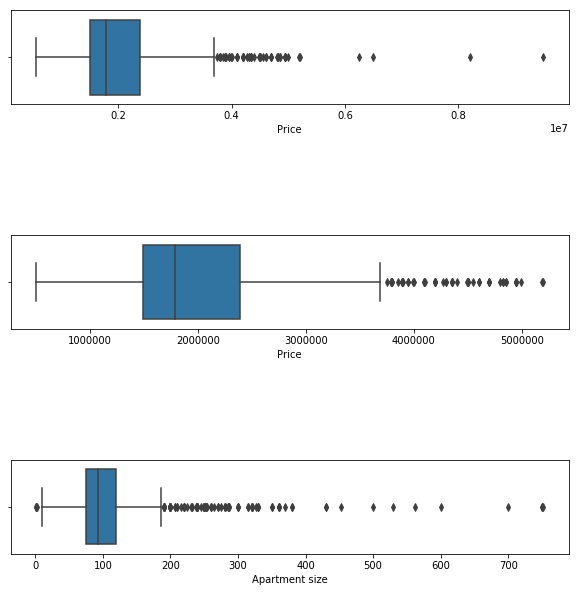

In [34]:
plt.figure(figsize=(10, 10))

plt.subplot(511)

sns.boxplot(YAD2_DF_clean["Price"])

YAD2_DF_clean.Price[YAD2_DF_clean.Price > 6000000] = 500000 

plt.subplot(513)

sns.boxplot(YAD2_DF_clean["Price"])

plt.subplot(515)

sns.boxplot(YAD2_DF_clean["Apartment size"]) 


plt.show()

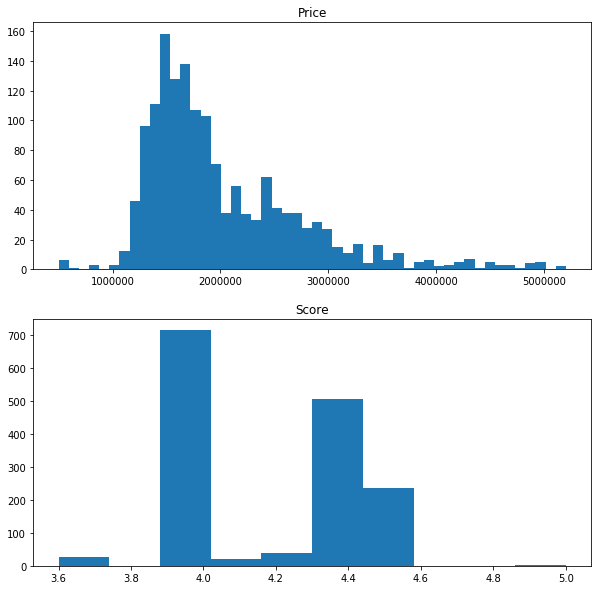

In [35]:
plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.hist(YAD2_DF_clean["Price"],bins=50)
plt.title('Price')

plt.subplot(212)
plt.hist(YAD2_DF_clean["Score"],bins=10)
plt.title('Score')

plt.show()

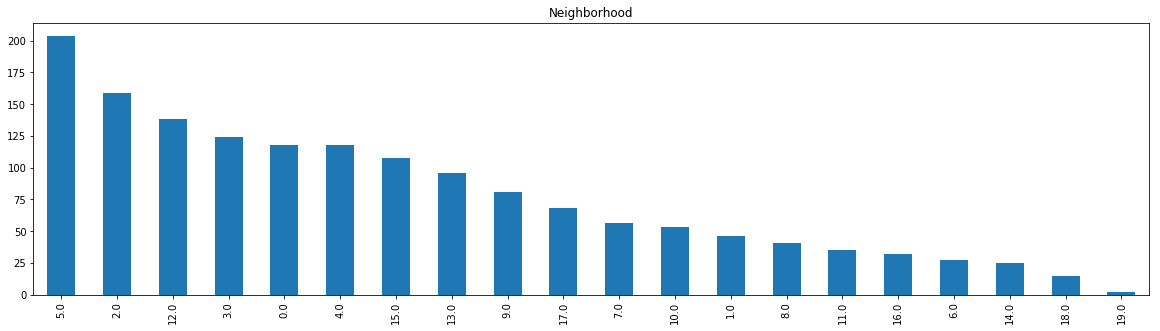

 מרכז 0
 קרית שרת מזרח 1
 קרית אילון 2
 קרית שרת מערב 3
 אגרובנק 4
 נאות רחל 5
 נאות שושנים 6
 רסקו א' 7
 נאות יהודית ונווה ארזים 8
 בן גוריון 9
 נווה רמז 10
 שיכון ותיקים 11
 אחר 12
 גרין ועם 13
 קרית רבין 14
 תל גיבורים 15
 רסקו ב' 16
 ג'סי כהן 17
 מפדה אזרחי 18
 קרית מיכה 19


In [36]:
plt.figure(figsize=(20, 5))
YAD2_DF_clean["Neighborhood"].value_counts().plot(kind="bar")
plt.title('Neighborhood')
plt.show()

for i,j in D["Neighborhood"].items():
    print(i,j)


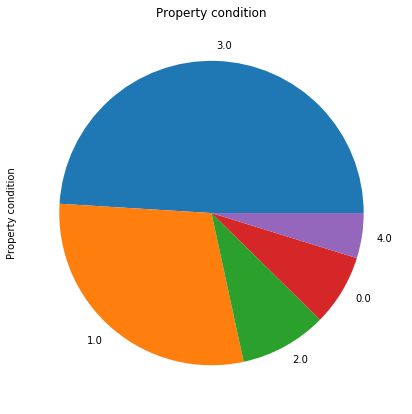

חדש 0
במצב שמור 1
חדש מקבלן 2
משופץ 3
דרוש שיפוץ 4


In [37]:
plt.figure(figsize=(20, 7))
YAD2_DF_clean["Property condition"].value_counts().plot(kind="pie")
plt.title('Property condition')
plt.show()

for i,j in D["Property condition"].items():
    print(i,j)


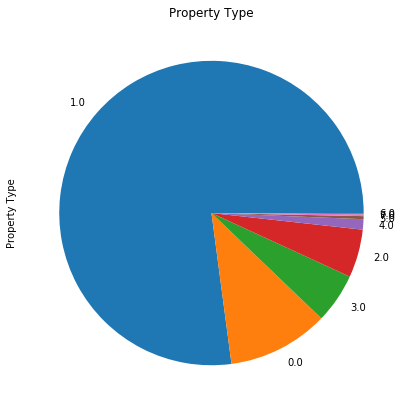

גג/פנטהאוז 0
דירה 1
דירת גן 2
פרטי/קוטג' 3
דופלקס 4
דו משפחתי 5
כללי 6
מרתף/פרטר 7


In [38]:
plt.figure(figsize=(20, 7))
YAD2_DF_clean["Property Type"].value_counts().plot(kind="pie")
plt.title('Property Type')
plt.show()

for i,j in D["Property Type"].items():
    print(i,j)


## Data engineering

In [39]:
list_add_columns = ["Renovated","MMD","Pandor doors","Tadiran conditioner",'Furniture','Access for disabled','Air conditioner','Lift',"Storage",'Bars']
list_add_columns

['Renovated',
 'MMD',
 'Pandor doors',
 'Tadiran conditioner',
 'Furniture',
 'Access for disabled',
 'Air conditioner',
 'Lift',
 'Storage',
 'Bars']

In [40]:


YAD2_DF_clean["AllExtras"] = YAD2_DF_clean['Kosher kitchen']

for i in list_add_columns:
    YAD2_DF_clean["AllExtras"] += YAD2_DF_clean[i]
    
YAD2_DF_clean["StoBalcParkTogether"] = YAD2_DF_clean['Storage']    
    
for i in ["Balconies","Parking"]:
    YAD2_DF_clean["StoBalcParkTogether"] += YAD2_DF_clean[i]
    
    
# Lt = ['Kosher kitchen',"Renovated","MMD","Pandor doors","Tadiran conditioner",'Furniture','Access for disabled','Air conditioner','Lift',"Storage",'Bars']

# df2.drop(columns= Lt ,inplace =True)


YAD2_DF_clean["NumberOfRoomsRounded"] = YAD2_DF_clean['Kosher kitchen']

for i in range(len(YAD2_DF_clean["Rooms"])):
    
    if YAD2_DF_clean["Rooms"][i] <= 3.5:
        YAD2_DF_clean["NumberOfRoomsRounded"][i] =  1
    elif YAD2_DF_clean["Rooms"][i] > 3.5 and YAD2_DF_clean["Rooms"][i] < 5:
        YAD2_DF_clean["NumberOfRoomsRounded"][i] =  2
    elif YAD2_DF_clean["Rooms"][i] >= 5:
        YAD2_DF_clean["NumberOfRoomsRounded"][i] =  3
        
        
YAD2_DF_clean

,Kosher kitchen,Renovated,MMD,Pandor doors,Tadiran conditioner,Furniture,Access for disabled,Air conditioner,Lift,Storage,...,Neighborhood,Real Estate,Score,Rooms,Floor,Apartment size,Price,AllExtras,StoBalcParkTogether,NumberOfRoomsRounded
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,4.3,3.5,5.0,170.0,2990000.0,7.0,4.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.5,3.0,3.0,70.0,1400000.0,2.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.3,3.0,2.0,70.0,1890000.0,4.0,2.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,4.3,4.0,0.0,145.0,2590000.0,5.0,3.0,2.0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,3.9,6.0,12.0,350.0,4500000.0,9.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,4.4,5.0,3.0,115.0,1860000.0,10.0,3.0,3.0
1542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,1.0,4.3,7.0,0.0,165.0,2530000.0,2.0,0.0,3.0
1543,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,1.0,4.4,5.0,3.0,106.0,1990000.0,8.0,0.0,3.0
1544,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,1.0,4.3,3.0,1.0,70.0,1450000.0,4.0,0.0,1.0


In [41]:
YAD2_DF_clean["AllExtras"].value_counts()

5.0     276
4.0     218
6.0     180
3.0     176
2.0     160
7.0     145
8.0     129
1.0     105
9.0      66
10.0     55
0.0      35
11.0      1
Name: AllExtras, dtype: int64

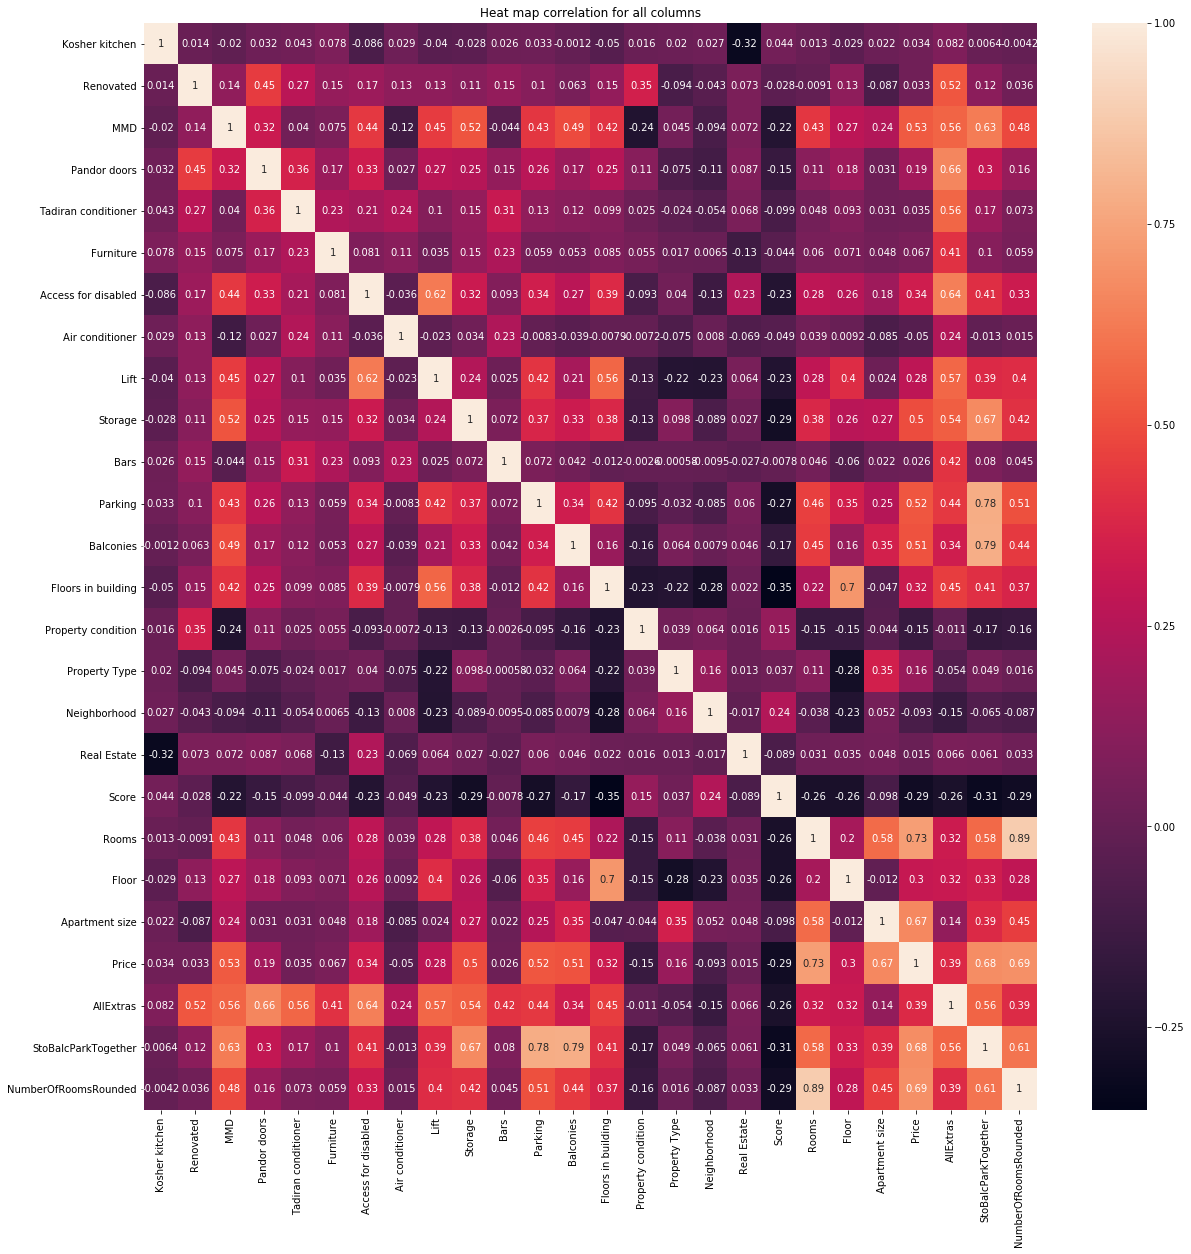

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(YAD2_DF_clean.corr(), annot=True)
plt.title('Heat map correlation for all columns')
plt.show()

split for the Training and target

In [43]:
def split_the_data_TRAINING_TARGET(df, label_column):
   

    TRAINING_FEATURES = df.columns[df.columns != str(label_column)]
    TARGET_FEATURE    = str(label_column)
    
    X = df[TRAINING_FEATURES]
    y = df[TARGET_FEATURE]
    
    return X,y

In [44]:
X,y = split_the_data_TRAINING_TARGET(YAD2_DF_clean,"Price")

In [45]:
X

,Kosher kitchen,Renovated,MMD,Pandor doors,Tadiran conditioner,Furniture,Access for disabled,Air conditioner,Lift,Storage,...,Property Type,Neighborhood,Real Estate,Score,Rooms,Floor,Apartment size,AllExtras,StoBalcParkTogether,NumberOfRoomsRounded
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,4.3,3.5,5.0,170.0,7.0,4.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,4.5,3.0,3.0,70.0,2.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,4.3,3.0,2.0,70.0,4.0,2.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,2.0,0.0,0.0,4.3,4.0,0.0,145.0,5.0,3.0,2.0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,3.9,6.0,12.0,350.0,9.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,4.4,5.0,3.0,115.0,10.0,3.0,3.0
1542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,10.0,1.0,4.3,7.0,0.0,165.0,2.0,0.0,3.0
1543,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,3.0,1.0,4.4,5.0,3.0,106.0,8.0,0.0,3.0
1544,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,12.0,1.0,4.3,3.0,1.0,70.0,4.0,0.0,1.0


In [46]:
y

0       2990000.0
1       1400000.0
2       1890000.0
3       2590000.0
4       4500000.0
          ...    
1541    1860000.0
1542    2530000.0
1543    1990000.0
1544    1450000.0
1545    1250000.0
Name: Price, Length: 1546, dtype: float64

# Transformation, normalization

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.19386566, -1.29233157,  1.3533299 , ...,  0.88110177,
         1.68734057, -1.03239171],
       [-0.19386566, -1.29233157, -0.73891813, ..., -1.16115211,
        -1.16361956, -1.03239171],
       [-0.19386566, -1.29233157,  1.3533299 , ..., -0.34425056,
         0.2618605 , -1.03239171],
       ...,
       [-0.19386566,  0.77379522, -0.73891813, ...,  1.28955255,
        -1.16361956,  1.42879192],
       [-0.19386566,  0.77379522, -0.73891813, ..., -0.34425056,
        -1.16361956, -1.03239171],
       [-0.19386566,  0.77379522, -0.73891813, ..., -1.16115211,
        -0.45087953, -1.03239171]])

In [48]:
import math 

for i in range(len(y)):
    y[i] = math.log10(y[i])  
    
y  = y.astype(float)

y

0       6.475671
1       6.146128
2       6.276462
3       6.413300
4       6.653213
          ...   
1541    6.269513
1542    6.403121
1543    6.298853
1544    6.161368
1545    6.096910
Name: Price, Length: 1546, dtype: float64

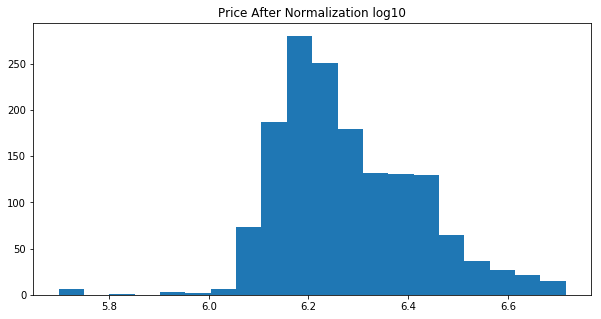

In [49]:
plt.figure(figsize=(10, 5))
plt.hist(y,bins=20)
plt.title('Price After Normalization log10')

plt.show()

# Machine Learning Algorithms

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 687)

Two supporting functions  

1 . Plot predicted and tast values in Graph

2 . Plot predicted and tast values in DataFrame

In [51]:
def plot_predicted_Regression(y_test, y_predicted, name : str):
    
    plt.figure(figsize=(50, 5))

    plt.plot(range(len(y_test[0:300])),y_test[0:300],'or',label = 'Test Data')

    plt.plot(range(len(y_predicted[0:300])),y_predicted[0:300],"--k",linewidth=2,label = name)
    plt.plot(range(len(y_predicted[0:300])),y_predicted[0:300],"ob",label = 'Predicted')

    plt.plot(range(len(y_train[0:300])),y_train[0:300],"og",label = 'Train Data')
    plt.xlim(0,300)
    plt.legend(loc = "upper center")
    plt.title('{} Regression VS Price '.format(name))

    plt.show()
    
    
def get_DataFrame_test_predicted(y_test, y_predicted, name : str):
    
    dictionary_test_predicted = {}

    dictionary_test_predicted["Test"] = y_test
    dictionary_test_predicted["{} predicted".format(name)] = y_predicted

    test_predicted_df = pd.DataFrame(dictionary_test_predicted)
    test_predicted_df.reset_index(inplace = True)
    test_predicted_df.drop(columns= "index",inplace =True)
    
    return test_predicted_df

## Linear Regression

In [52]:
model_LinearRegression = LinearRegression()

model_LinearRegression.fit(X_train, y_train)

y_predicted_LinearRegression = model_LinearRegression.predict(X_test)

pred_vals_predicted_LinearRegression = r2_score(y_test,y_predicted_LinearRegression)

print("Linear Regression")

print('Accuracy on test Data = ',  model_LinearRegression.score(X_test,y_test))
print('Accuracy on train Data  = ', model_LinearRegression.score(X_train,y_train))

Linear Regression
Accuracy on test Data =  0.8436925346147821
Accuracy on train Data  =  0.6417238029775025


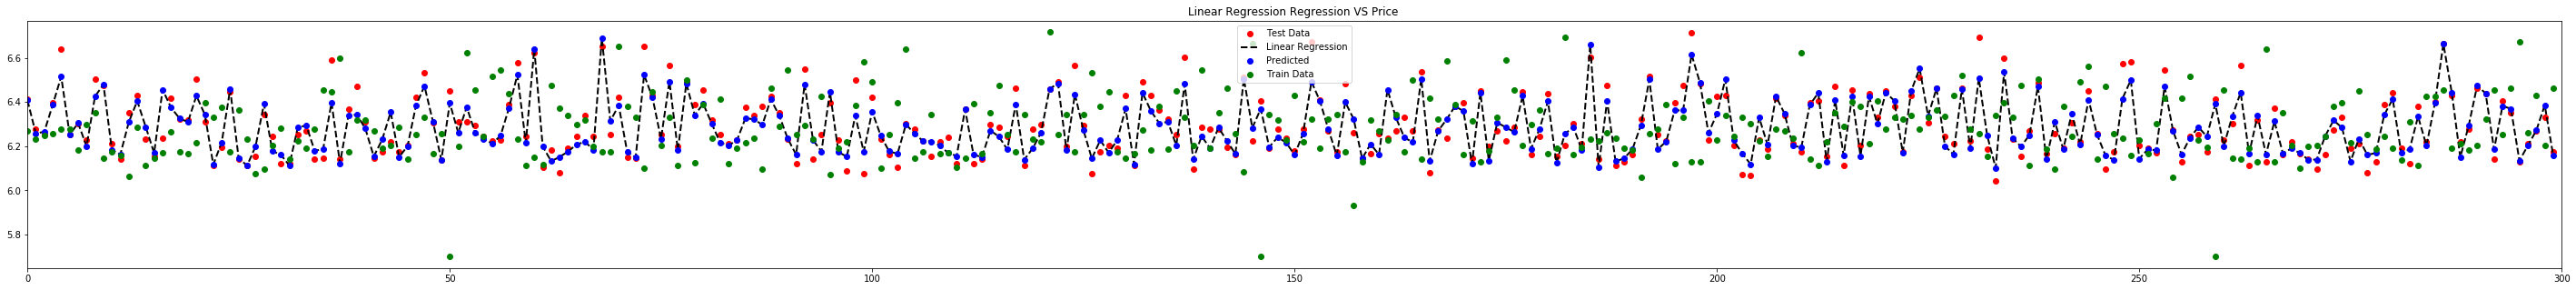

,Test,Linear Regression predicted
0,6.413300,6.407710
1,6.278754,6.256202
2,6.252853,6.265795
3,6.397940,6.387416
4,6.638489,6.515163
...,...,...
459,6.414973,6.374335
460,6.162863,6.146899
461,6.298853,6.270068
462,6.429752,6.419338


In [53]:
plot_predicted_Regression(y_test ,y_predicted_LinearRegression, "Linear Regression")
get_DataFrame_test_predicted(y_test ,y_predicted_LinearRegression, "Linear Regression")

## Lasso Regression

In [54]:
model_LassoRegression = Lasso(alpha=0.0001)

model_LassoRegression.fit(X_train, y_train)

y_predicted_LassoRegression = model_LassoRegression.predict(X_test)

pred_vals_predicted_LassoRegression = r2_score(y_test,y_predicted_LassoRegression)

print("Lasso Regression")

print('Accuracy on test Data = ',  model_LassoRegression.score(X_test,y_test))
print('Accuracy on train Data  = ', model_LassoRegression.score(X_train,y_train))
print('alpha = 0.0001')

Lasso Regression
Accuracy on test Data =  0.843001751223005
Accuracy on train Data  =  0.64214973158994
alpha = 0.0001


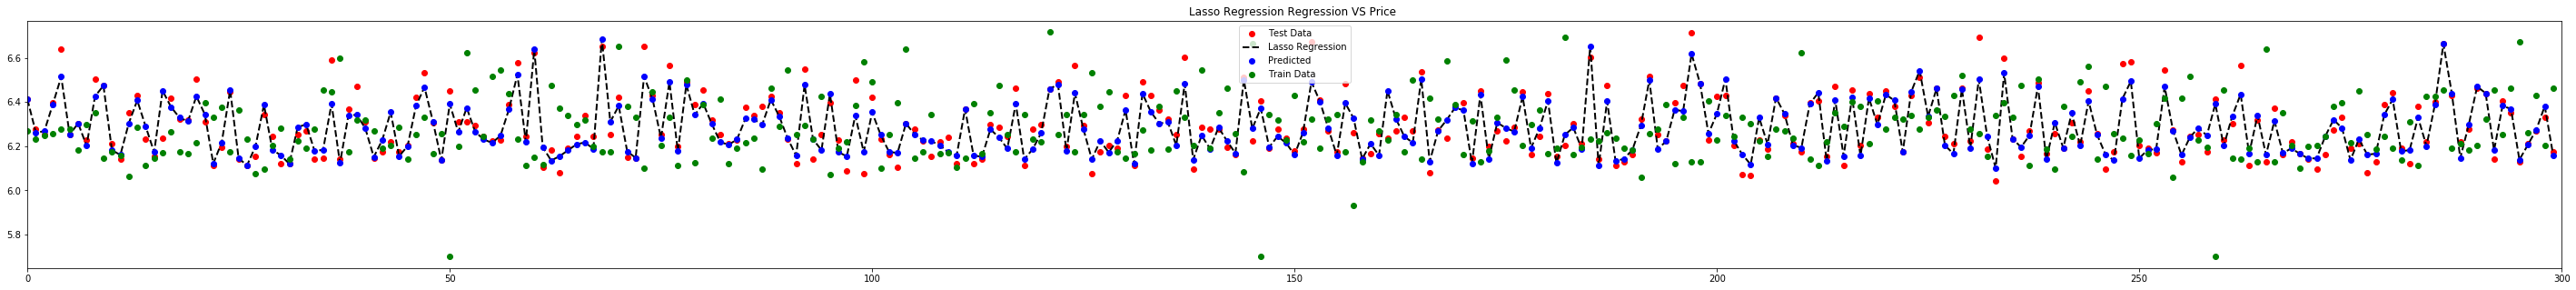

,Test,Lasso Regression predicted
0,6.413300,6.411455
1,6.278754,6.261373
2,6.252853,6.267308
3,6.397940,6.388606
4,6.638489,6.513825
...,...,...
459,6.414973,6.376922
460,6.162863,6.147445
461,6.298853,6.268880
462,6.429752,6.413271


In [55]:
plot_predicted_Regression(y_test ,y_predicted_LassoRegression, "Lasso Regression")
get_DataFrame_test_predicted(y_test ,y_predicted_LassoRegression, "Lasso Regression")

#### fine tuning and find the best Alpha Lasso

In [56]:
# i = 0.1
# m= 0
# g=0
# mm = 0
# while i < 100 :

#     clf = Lasso(alpha=i)
#     clf.fit(X_train,y_train)

#     y_predicted = clf.predict(X_test)

#     m = r2_score(y_test,y_predicted)
    
#     if m > mm:
#         mm = m
#         g= i
#     i += 0.001
    
    
# print(mm,g)


## Ridge Regression

In [57]:
model_RidgeRegression = Ridge(alpha=7.629999999999882)

model_RidgeRegression.fit(X_train, y_train)

y_predicted_RidgeRegression = model_RidgeRegression.predict(X_test)

pred_vals_predicted_RidgeRegression = r2_score(y_test,y_predicted_RidgeRegression)

print("Ridge Regression")

print('Accuracy on test Data = ',  model_RidgeRegression.score(X_test,y_test))
print('Accuracy on train Data  = ', model_RidgeRegression.score(X_train,y_train))
print('alpha = 7.629999999999882')

Ridge Regression
Accuracy on test Data =  0.8427326894720683
Accuracy on train Data  =  0.6421567580685008
alpha = 7.629999999999882


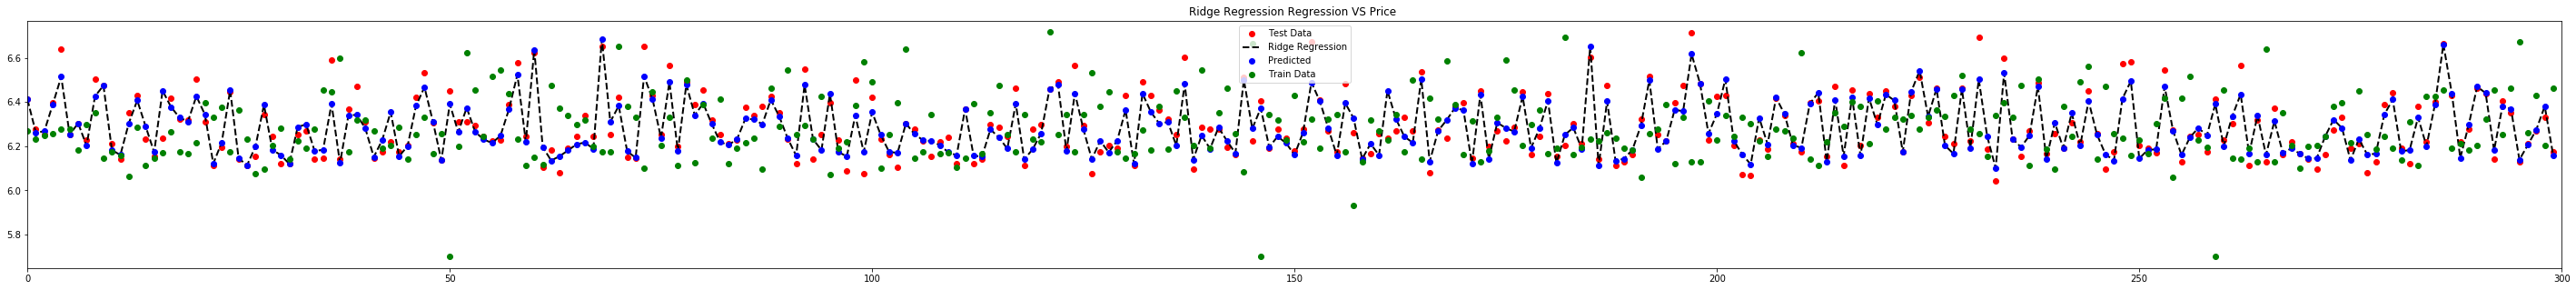

,Test,Ridge Regression predicted
0,6.413300,6.411335
1,6.278754,6.261298
2,6.252853,6.267153
3,6.397940,6.388788
4,6.638489,6.514163
...,...,...
459,6.414973,6.376925
460,6.162863,6.147278
461,6.298853,6.269089
462,6.429752,6.412968


In [58]:
plot_predicted_Regression(y_test ,y_predicted_RidgeRegression, "Ridge Regression")
get_DataFrame_test_predicted(y_test ,y_predicted_RidgeRegression, "Ridge Regression")



#### fine tuning and find the best Alpha Ridge

In [59]:
# i = 0.1
# m= 0
# g=0
# mm = 0
# while i < 100 :

#     clf = Ridge(alpha=i)
#     clf.fit(X_train,y_train)

#     y_predicted = clf.predict(X_test)

#     m = r2_score(y_test,y_predicted)
#     i+=0.01
#     if m > mm:
#         mm = m
#         g= i
    
    
# print(mm,g)